#  <center><font color='#913175' size=7>A/B Testing</font></center>

***

# <div>
<img src="https://www.omniconvert.com/wp-content/uploads/2019/10/new-hero-ab-testing-med.png" width="500"/>
</div>

###  <font color='#913175' size=5>What is A/B Testing?</font>

<font color='#13005A'>A/B testing is a user experience research methodology. From a Data Scientist’s perspective, A/B testing is a form of statistical hypothesis testing or a significance test.<br><br> A/B tests consist of a randomized experiment that usually involves two variants (A and B), although the concept can be also extended to multiple variants of the same variable. It includes application of statistical hypothesis testing or "two-sample hypothesis testing" as used in the field of statistics.<br><br> A/B testing is a way to compare multiple versions of a single variable, for example by testing a subject's response to variant A against variant B, and determining which of the variants is more effective. <br><br>It is prevalent in marketing and product development to optimize a website, mobile app UI, or other products to achieve a specific goal, such as increasing conversion rate, maximizing revenue, increasing sales, etc.</font>

###  <font color='#913175' size=5>A/B Testing Need-to-Know Terms</font>

###  <font color='#13005A' size=4>Null hypothesis</font>
<font color='#13005A'>The null hypothesis, or H0, posits that there is no difference between two variables. In A/B testing, the null hypothesis would assume that changing one variable on a web page (or marketing asset) would have no impact on user behavior.  </font>
###  <font color='#13005A' size=4>Alternative hypothesis</font>
<font color='#13005A'>Alternative hypothesis defines there is a statistically important relationship between two variables. We can also say that it is simply an alternative to the null</font>
###  <font color='#13005A' size=4>Statistical significance</font>
<font color='#13005A'>Statistical significance is meant to signify that the results of an A/B test are not due to chance (rejecting the null hypothesis). This is calculated by measuring the p-value, or probability value. So, if the p-value is low, it is saying that it’s unlikely the results of the A/B test were random. </font>
###  <font color='#13005A' size=4>P-Value</font>
<font color='#13005A'>P-value is the probability of obtaining given observations or results, given that the null hypothesis is true. If the p-value is less than the significance level (alpha level) that was set before the study, then the null hypothesis is rejected. A p-value of 0.05 or lower is generally considered statistically significant.</font>
###  <font color='#13005A' size=4>Confidence level</font>
<font color='#13005A'>Güven düzeyini p değerinin tersi olarak düşünün. Güven düzeyi, denemenizin sonuçlarının değişen değişkenden kaynaklanma olasılığının göstergesidir (yani, bu sonuçlar rastgele veya şans eseri değildir). Bir test, p-değeri %5 iken istatistiksel olarak anlamlı kabul edilirse, güven düzeyi %95 olur.</font>

###  <font color='#913175' size=5>A/B Testing Process</font>

<font size=3 color='#13005A'><ol>
    <li>Understanding business problem & data</li>
    <li>Look summary stats</li>
    <li>Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)</li>
    <li>Apply hypothesis testing and check assumptions</li>
    <li>Check Normality & Homogeneity</li>
    <li>Apply tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)</li>
    <li>Evaluate the results</li>
    <li>Recommend business decision</li>
</ol></font>

###  <font color='#913175' size=5>Import Packages and Libraries</font>

In [140]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore
import scipy.stats as stats
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings("ignore")
# !pip install statsmodels

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

###  <font color='#913175' size=5>Load Data</font>

In [120]:
df = pd.read_csv('AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00000
1,2423,control,0.00000
2,9411,control,0.00000
3,7311,control,0.00000
4,6174,variant,0.00000


<hr style="height:1px;border-width:0;color:#913175;background-color:#913175">

<font color='#13005A' size=4>Business problem is to observe if there is a statistical difference in the revenues according to the variant and control groups.</font>

<hr style="height:1px;border-width:0;color:#913175;background-color:#913175">

###  <font color='#913175' size=5>Information About the Dataset</font>

In [23]:
def info_df(dataframe, head=5):
    print(Fore.GREEN +"SHAPE ".center(70,'-'))
    print(Fore.BLACK +'Rows:', dataframe.shape[0])
    print(Fore.BLACK +'Columns:',dataframe.shape[1])
    print(Fore.GREEN +'TYPES'.center(70, '-'))
    print(Fore.BLACK, dataframe.dtypes)
    print(Fore.GREEN +" MISSING VALUES ".center(70,'-'))
    print(Fore.BLACK, dataframe.isnull().sum())
    print(Fore.GREEN +" DUPLICATED VALUES ".center(70,'-'))
    print(Fore.BLACK, dataframe.duplicated().sum())
    print(Fore.GREEN +" DESCRIBE ".center(70,'-'))
    print(Fore.BLACK, dataframe.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]).T)
    
info_df(df)

--------------------------------SHAPE --------------------------------
Rows: 10000
Columns: 3
--------------------------------TYPES---------------------------------
 USER_ID           int64
VARIANT_NAME     object
REVENUE         float64
dtype: object
--------------------------- MISSING VALUES ---------------------------
 USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64
------------------------- DUPLICATED VALUES --------------------------
 2067
------------------------------ DESCRIBE ------------------------------
               count       mean        std     min      0%        10%  \
USER_ID 10000.00000 4981.08020 2890.59011 2.00000 2.00000 1008.80000   
REVENUE 10000.00000    0.09945    2.31853 0.00000 0.00000    0.00000   

               20%        30%        40%        50%        60%        70%  \
USER_ID 1962.60000 2947.00000 3940.60000 4962.00000 5965.00000 6994.00000   
REVENUE    0.00000    0.00000    0.00000    0.00000    0.00000    0.00000   

           

###  <font color='#913175' size=5>Data Cleaning and Outlier Extraction</font>

In [74]:
# Unique customer count
print('Total Rows:',df.shape[0])
print('Total Unique Users',df['USER_ID'].nunique())

Total Rows: 10000
Total Unique Users 6324


In [121]:
# Keeping users that belongs only 1 A/B test group
counts = df.groupby("USER_ID")["VARIANT_NAME"].nunique()
single_variant_ids = counts[counts == 1].index
df = df[df["USER_ID"].isin(single_variant_ids)]

In [122]:
# Confidence interval for the 'REVENUE'
sms.DescrStatsW(df["REVENUE"]).tconfint_mean()

(0.03979437295047475, 0.1743341278732485)

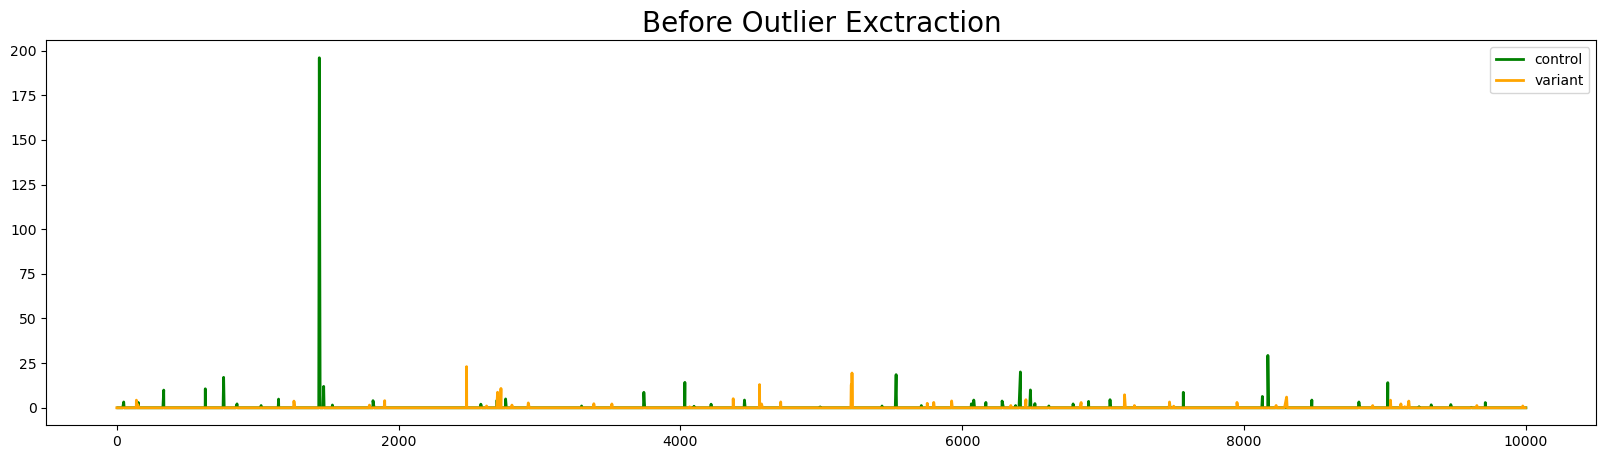

In [123]:
# Before Outlier Exctraction
def plot_revenue(dataframe, title):
    control_revenue = dataframe.loc[dataframe['VARIANT_NAME'] == 'control', 'REVENUE']
    variant_revenue = dataframe.loc[dataframe['VARIANT_NAME'] == 'variant', 'REVENUE']
    plt.figure(figsize=(20, 5))
    plt.plot(control_revenue, color='green', linewidth=2, label='control')
    plt.plot(variant_revenue, color='orange', linewidth=2, label='variant')
    plt.legend()
    plt.title(title, fontsize=20)
    plt.show()
    
plot_revenue(df, 'Before Outlier Exctraction')    

In [124]:
# Replacing outliers with the low and up limits
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(df, "REVENUE")

In [125]:
# Confidence interval for the 'REVENUE'
sms.DescrStatsW(df["REVENUE"]).tconfint_mean()

(0.03595388879674287, 0.05730476029716157)

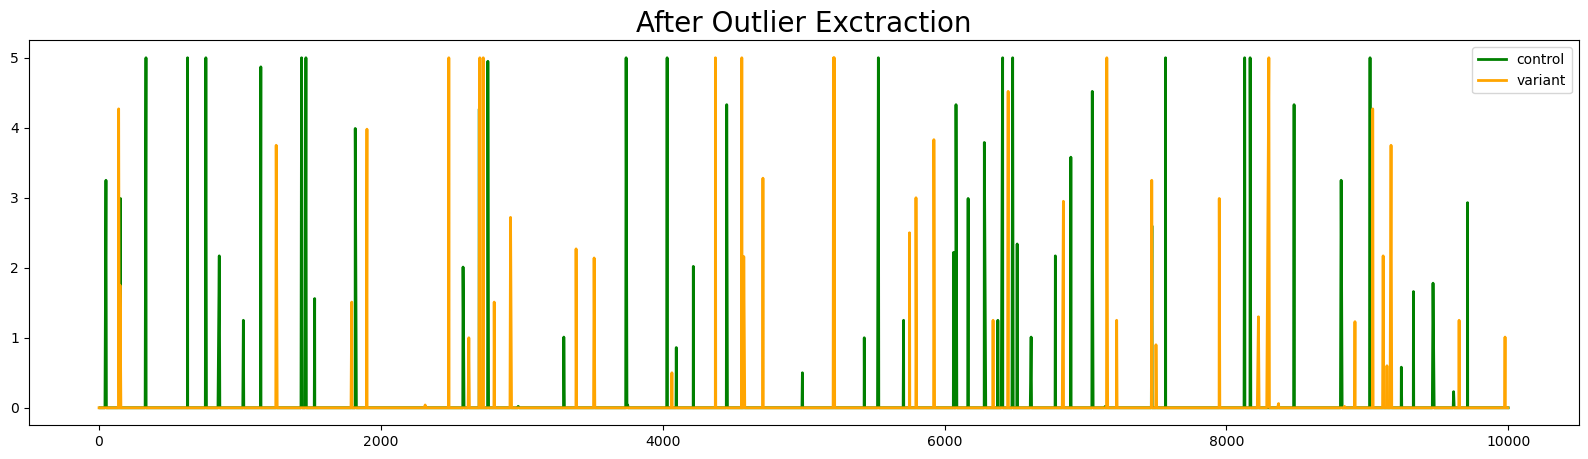

In [127]:
# After Outlier Exctraction
plot_revenue(df, 'After Outlier Exctraction')     

###  <font color='#913175' size=5>A/B Testing</font>

**<font color='#13005A' size=4>Question:</font>**

<font color='#13005A' size=4>Is there a significant difference between the average REVENUE of the control and variant groups ?</font>

In [175]:
# Total revenue of control and variant groups
df.groupby('VARIANT_NAME').agg({'REVENUE': ['sum']}).reset_index()

,VARIANT_NAME,REVENUE
,,sum
0,control,165.06000
1,variant,117.98000


**<font color='#13005A' size=4>Hypothesis</font>**

<font color='#13005A' size=4>H0: </font><font color='#13005A' size=3> No, there is no difference between population A and population B. (M1  = M2)</font><br>
<font color='#13005A' size=4>H1: </font><font color='#13005A' size=3> Yes, there is a difference between population A and population B. (M1 ≠ M2)</font>

# <div>
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*LDhUu0BkB1QuOTxHmOs-cw.jpeg" width="350" align="left"/>
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*d5-m8289OkKti9rO7WVcdQ.jpeg" width="500" align="center"/>

</div>

###  <font color='#13005A' size=4>Steps:</font><br>
<font color='#13005A'><ol>
    <li>Set up the Hypothesis</li>
    H0: M1 = M2<br>
    H1: M1 ≠ M2
    <li>Normality Assumption</li>
    H0: Distribution is Normal!<br>
    H1: Distribution is not Normal!
    <li>Homogeneity of Variances</li>
    H0: Homogeneity<br>
    H1: Heterogeneous
    <li>Apply Parametric (ttest_ind) or Non-Parametric Test (Mann-Whitney U)</li>
</ol></font>

In [174]:
def AB_Test(dataframe, group, target, A, B, alpha=0.05):
    
    # Split A/B
    groupA = dataframe[dataframe[group] == A][target]
    groupB = dataframe[dataframe[group] == B][target]
    
    # Normality assumption test
    if shapiro(groupA)[1] > alpha and shapiro(groupB)[1] > alpha:
        test_type = "Parametric"
        
        # Homogeneity of variances test
        if levene(groupA, groupB)[1] > alpha:
            # Heterogeneous
            equal_var = False
        else:
            # Homogeneity
            equal_var = True
        
        # Two-sample t-test
        t_stat, p_value = stats.ttest_ind(groupA, groupB, equal_var=equal_var)
        
    else:
        test_type = "Non-Parametric"
        # Mann-Whitney U test
        u_stat, p_value = stats.mannwhitneyu(groupA, groupB)
        
    # Result
    if p_value < alpha:
        result = "Reject H0"
    else:
        result = "Fail to reject H0"
    
    # Conclusion
    if test_type == "Parametric":
        if result == "Reject H0":
            comment = "A/B groups are significantly different."
        else:
            comment = "A/B groups are not significantly different."
    else:
        if result == "Reject H0":
            comment = "A/B groups are not equal in distribution."
        else:
            comment = "A/B groups are equal in distribution."
    
    # Output
    output = pd.DataFrame({
        "Test Type": [test_type],
        "Homogeneity of Variances": [equal_var if test_type == "Parametric" else "-"],
        "P-value": [p_value],
        "Result": [result],
        "Conclusion": [comment]
    })
    
    return output

# Apply A/B Testing

AB_Test(df, "VARIANT_NAME", "REVENUE", 'control', 'variant')

,Test Type,Homogeneity of Variances,P-value,Result,Conclusion
0,Non-Parametric,-,0.24485,Fail to reject H0,A/B groups are equal in distribution.


###  <font color='#913175' size=5>Result</font>

<hr style="height:1px;border-width:0;color:#913175;background-color:#913175">

<font color='#13005A' size=4>As a result, there is no statistically proven difference between the revenue of the control and variant groups.</font>

<hr style="height:1px;border-width:0;color:#913175;background-color:#913175">